# Speed vs 1-block ratio (allocate operation)

This code will generate a line chart showing how allocator speed performance is affected with memory size.

## Parameters

In [3]:
input_csv = 'data/speed_benchmarks.csv'

op = 'Allocate'
mem_usage = 50
bl1_ratio = 50
use_log = True

use_log_text = 'log ' if use_log else ''
title = f"{op} performance - speed vs memory size"
file = f'rendered/{op} # speed vs memory size {use_log_text}# memusage {mem_usage} # b1 {bl1_ratio}.png'

save = False

## The code

### Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, ScalarFormatter, LogLocator)

### Load & filter data

In [5]:
all_benchmarks = pd.read_csv(input_csv)

# convert from bytes to MB
all_benchmarks['Memory size'] = all_benchmarks['Memory size'].apply(lambda x: x / (1024 * 1024))

data = all_benchmarks[
    (all_benchmarks["Operation"] == op) &
    (all_benchmarks["Memory usage"] == mem_usage) &
    (all_benchmarks["Block 1 ratio"] == bl1_ratio)].groupby('Allocator')

### Plot

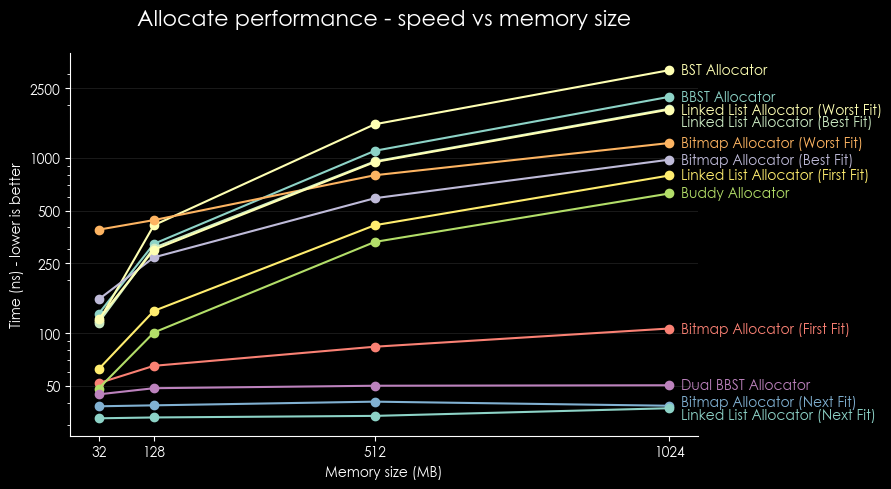

In [6]:
data_xticks = all_benchmarks['Memory size'].unique()

plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Century Gothic'
plt.figure(figsize=(9, 5))
plt.title(title, fontsize=16, pad=20)
ax = plt.subplot()

label_xoffset = 20

for group in data:
    myplot = ax.plot(group[1]['Memory size'],
                     group[1]['Average (us)'],
                     '-o',
                     label=group[0]
                    )

    #
    # Fine tune y offset of labels, so they can be read.
    # These probably need to be adjusted if the data changes
    #
    label_yoffset = 0
    if 'Linked List Allocator (Next Fit)' in group[0]:
        label_yoffset=-3
    elif 'Bitmap Allocator (Next Fit)' in group[0]:
        label_yoffset=2
    elif 'Linked List Allocator (Best Fit)' in group[0]:
        label_yoffset=-300
    
    max_mem_size = group[1]['Memory size'].max()
    max_row = group[1][group[1]['Memory size'] == max_mem_size]

    plt.text(label_xoffset+max_row['Memory size'].iloc[0],
             label_yoffset+max_row['Average (us)'].iloc[0],
             group[0],
             va = 'center',
             c = myplot[0].get_color())

ax.set_xlabel('Memory size (MB)')
ax.set_xticks(data_xticks)
ax.set_ylabel('Time (ns) - lower is better')
if use_log:
    ax.set_yscale('log')
ax.yaxis.set_major_formatter(ScalarFormatter())
if use_log:
    ax.yaxis.set_major_locator(LogLocator(base=10, subs=(0.25,0.5,1.0), numticks=20))
    
ax.grid(True, axis='y', color='white', alpha=.1)
ax.spines[['right', 'top']].set_visible(False)
fig = plt.gcf()
fig.tight_layout()
if save:
    fig.savefig(file, transparent=True, dpi=300)
plt.show()